<a href="https://colab.research.google.com/github/gonzalezzayra/SIMULACION-I/blob/main/M%C3%A9todo_Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método Box-Müller**

**(Mejor método para generar las normales)**

Los experimentos de muestreo a menudo requieren la generación de un gran número de desviaciones normales aleatorias. Cuando se utiliza una computadora electrónica, es deseable organizar la generación de dichas desviaciones normales dentro de la propia maquina en lugar de depender de tablas.

Los números pseudoaleatorios pueden generarse mediante diversos métodos dentro de la máquina, y el propósito de esta nota es presentar lo que se considera un nuevo método para generar desviaciones normales a partir de números aleatorios independientes. Este enfoque puede utilizarse tanto en computadoras pequeñas como grandes.



**Método:**



Sea $U_1$, $U_2$ variables aleatorias independientes de la misma función de densidad rectangular en el intervalo $(0,1)$. Considere las variables aleatorias:

$$ X = \sqrt{(-2 \log U_1 )} cos 2\pi U_2$$

$$ Y = \sqrt{(-2 \log U_1 )} sin 2\pi U_2$$

Estas dos expresiones son fundamentales para el desarrollo del algoritmo, en nuestro caso ocupamos $X \text{ e } Y$

Mejor de esta forma para simplificarlo y sea más sencillo de visualizar, utilizamos $R$ y $\theta$:


\begin{aligned}
&\text{ } R = \sqrt{ -2\ln U_1 }, \quad \theta = 2\pi U_2 \\
&\text{ } X = R \cos \theta, \quad Y = R \sin \theta \\
\end{aligned}


$X,Y$ serán un par de variables aleatorias independientes de la misma distribución normal con media cero y varianza unitaria.

De la función gaussiana inversa de las desviaciones uniformes, se obtienen de inmediato las relaciones inversas:

$$U_1 = e^{\frac{-(X^{2}+ Y^{2})}{2}}$$

$$U_2 = -\frac{1}{2\pi} \cdot \arctan \frac{Y}{X}$$


De ello se deduce que la densidad conjunta de $X$, $Y$ es

$$f(X,Y)=\frac{1}{2\pi} e^{-\frac{X + Y}{2}} = \frac{1}{\sqrt{2\pi}} e^{-\frac{-X^{2}}{2}}\cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{-Y^{2}}{2}} = f(X)f(Y)$$


La densidad de probabilidad de $f(X,Y)$ es constante en círculos, por lo que $\theta = \arctan (Y/X) $ se distribuye uniformemente $(0,2\pi)$.

El cuadrado de la longitud del radio vector $r^{2} = X^{2} + Y^{2}$ tiene una distribución chi-cuadrada con dos grados de libertad.

Si $U$ tiene una densidad rectangular en $(0,1)$, entonces $- 2\log_{e} U $ tiene una distribución chi-cuadrada con dos grados de libertad.



**Generalizaciones y otras variables aleatorias**

La suma de $k$ términos $\sum_{i=1}^k (-2 \log U_i)$genera una Chi-cuadrada con $2k$ grados de libertad. Para $2k+1$ grados, se añade el cuadrado de una normal.

El método permite generar normales n-dimensionales con medias y covarianzas arbitrarias usando normales independientes.

**Convenencia y precisión**

El método sugerido aquí surge del deseo de tener una forma de generar desviaciones normales que sea confiable en los valores de la distribución para centros de cómputo que dependan de funciones trigonométricas, logaritmos y raíces cuadradas; este enfoque requiere poco programa adicional de escritura en la máquina.


**Pseudocódigo:**

\begin{aligned}
&\text{Generar } U_1, U_2 \sim U(0,1) \\
&\text{Hacer } R = \sqrt{ -2\ln U_1 }, \quad \theta = 2\pi U_2 \\
&\text{Hacer } X = R \cos \theta, \quad Y = R \sin \theta \\
&\text{Salir } X, Y
\end{aligned}



In [22]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [ ]:
#Definir box,como todos los calculos que se necesitan
def box():
    U1 = rd.uniform(0,1) #Generar los dos numeros aleatorios U1 y U2
    U2 = rd.uniform(0,1)
    R = np.sqrt(-2*np.log(U1)) #Calcular R
    theta = 2*np.pi*U2 #Calcular theta
    X = R*np.cos(theta) #Calcular X
    Y = R*np.sin(theta) #Calcular Y
    return X,Y

In [ ]:
#Crear dos listas para x e y
listax = []
listay = []

#Definir el experimento
def experimento(n):
  for _ in range(n): #Ciclo for para que podamos generar varios
    X,Y = box() #Asignamos el valor de x e y a la función
    listax.append(X) #Adjuntar a la lista de x
    listay.append(Y) #Adjuntar a la lista de y
  return listax, listay

In [23]:
#experimento
l = experimento(100000)

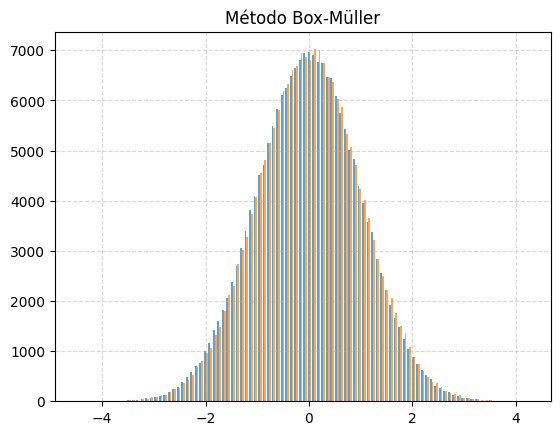

In [24]:
#Graficar
plt.hist(l, bins=100 ,alpha = 0.7)
plt.title("Método Box-Müller")
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.show()

In [25]:
#Calcular media y desviación estandar
print("La media es: ", np.mean(l))
print("La desviación estandar es: ", np.std(l))

#Resultados teoricos
print("Los resultados teoricos")
print("La media es: ", 0)
print("La desviación estandar es: ", 1)

La media es:  -0.002142488204097182
La desviación estandar es:  1.00048672783369
Los resultados teoricos
La media es:  0
La desviación estandar es:  1


In [26]:
# Calcular errores

# Imprimir errores
print("Errores para la media:")
print("Error absoluto:", np.abs(0 - np.mean(l)))
#No obtenemos el error relativo o porcentual porque se divide entre 0

print("\nErrores para la desviación estándar:")
print("Error absoluto:", np.abs(1 - np.std(l)))
print("Error relativo:", np.abs(1 - np.std(l))/ np.abs(1))
print("Error porcentual:", (np.abs(1 - np.std(l))/np.abs(1)) * 100, "%")

Errores para la media:
Error absoluto: 0.002142488204097182

Errores para la desviación estándar:
Error absoluto: 0.0004867278336899705
Error relativo: 0.0004867278336899705
Error porcentual: 0.04867278336899705 %
